<a href="https://colab.research.google.com/github/dvsnkumar/GUVI_assignment_task_7/blob/main/types_of_glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required packages

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


Reading data from trainKNN.txt

In [78]:
df = pd.read_csv('/content/trainKNN.txt')

In [79]:
df.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']

EDA

In [80]:
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


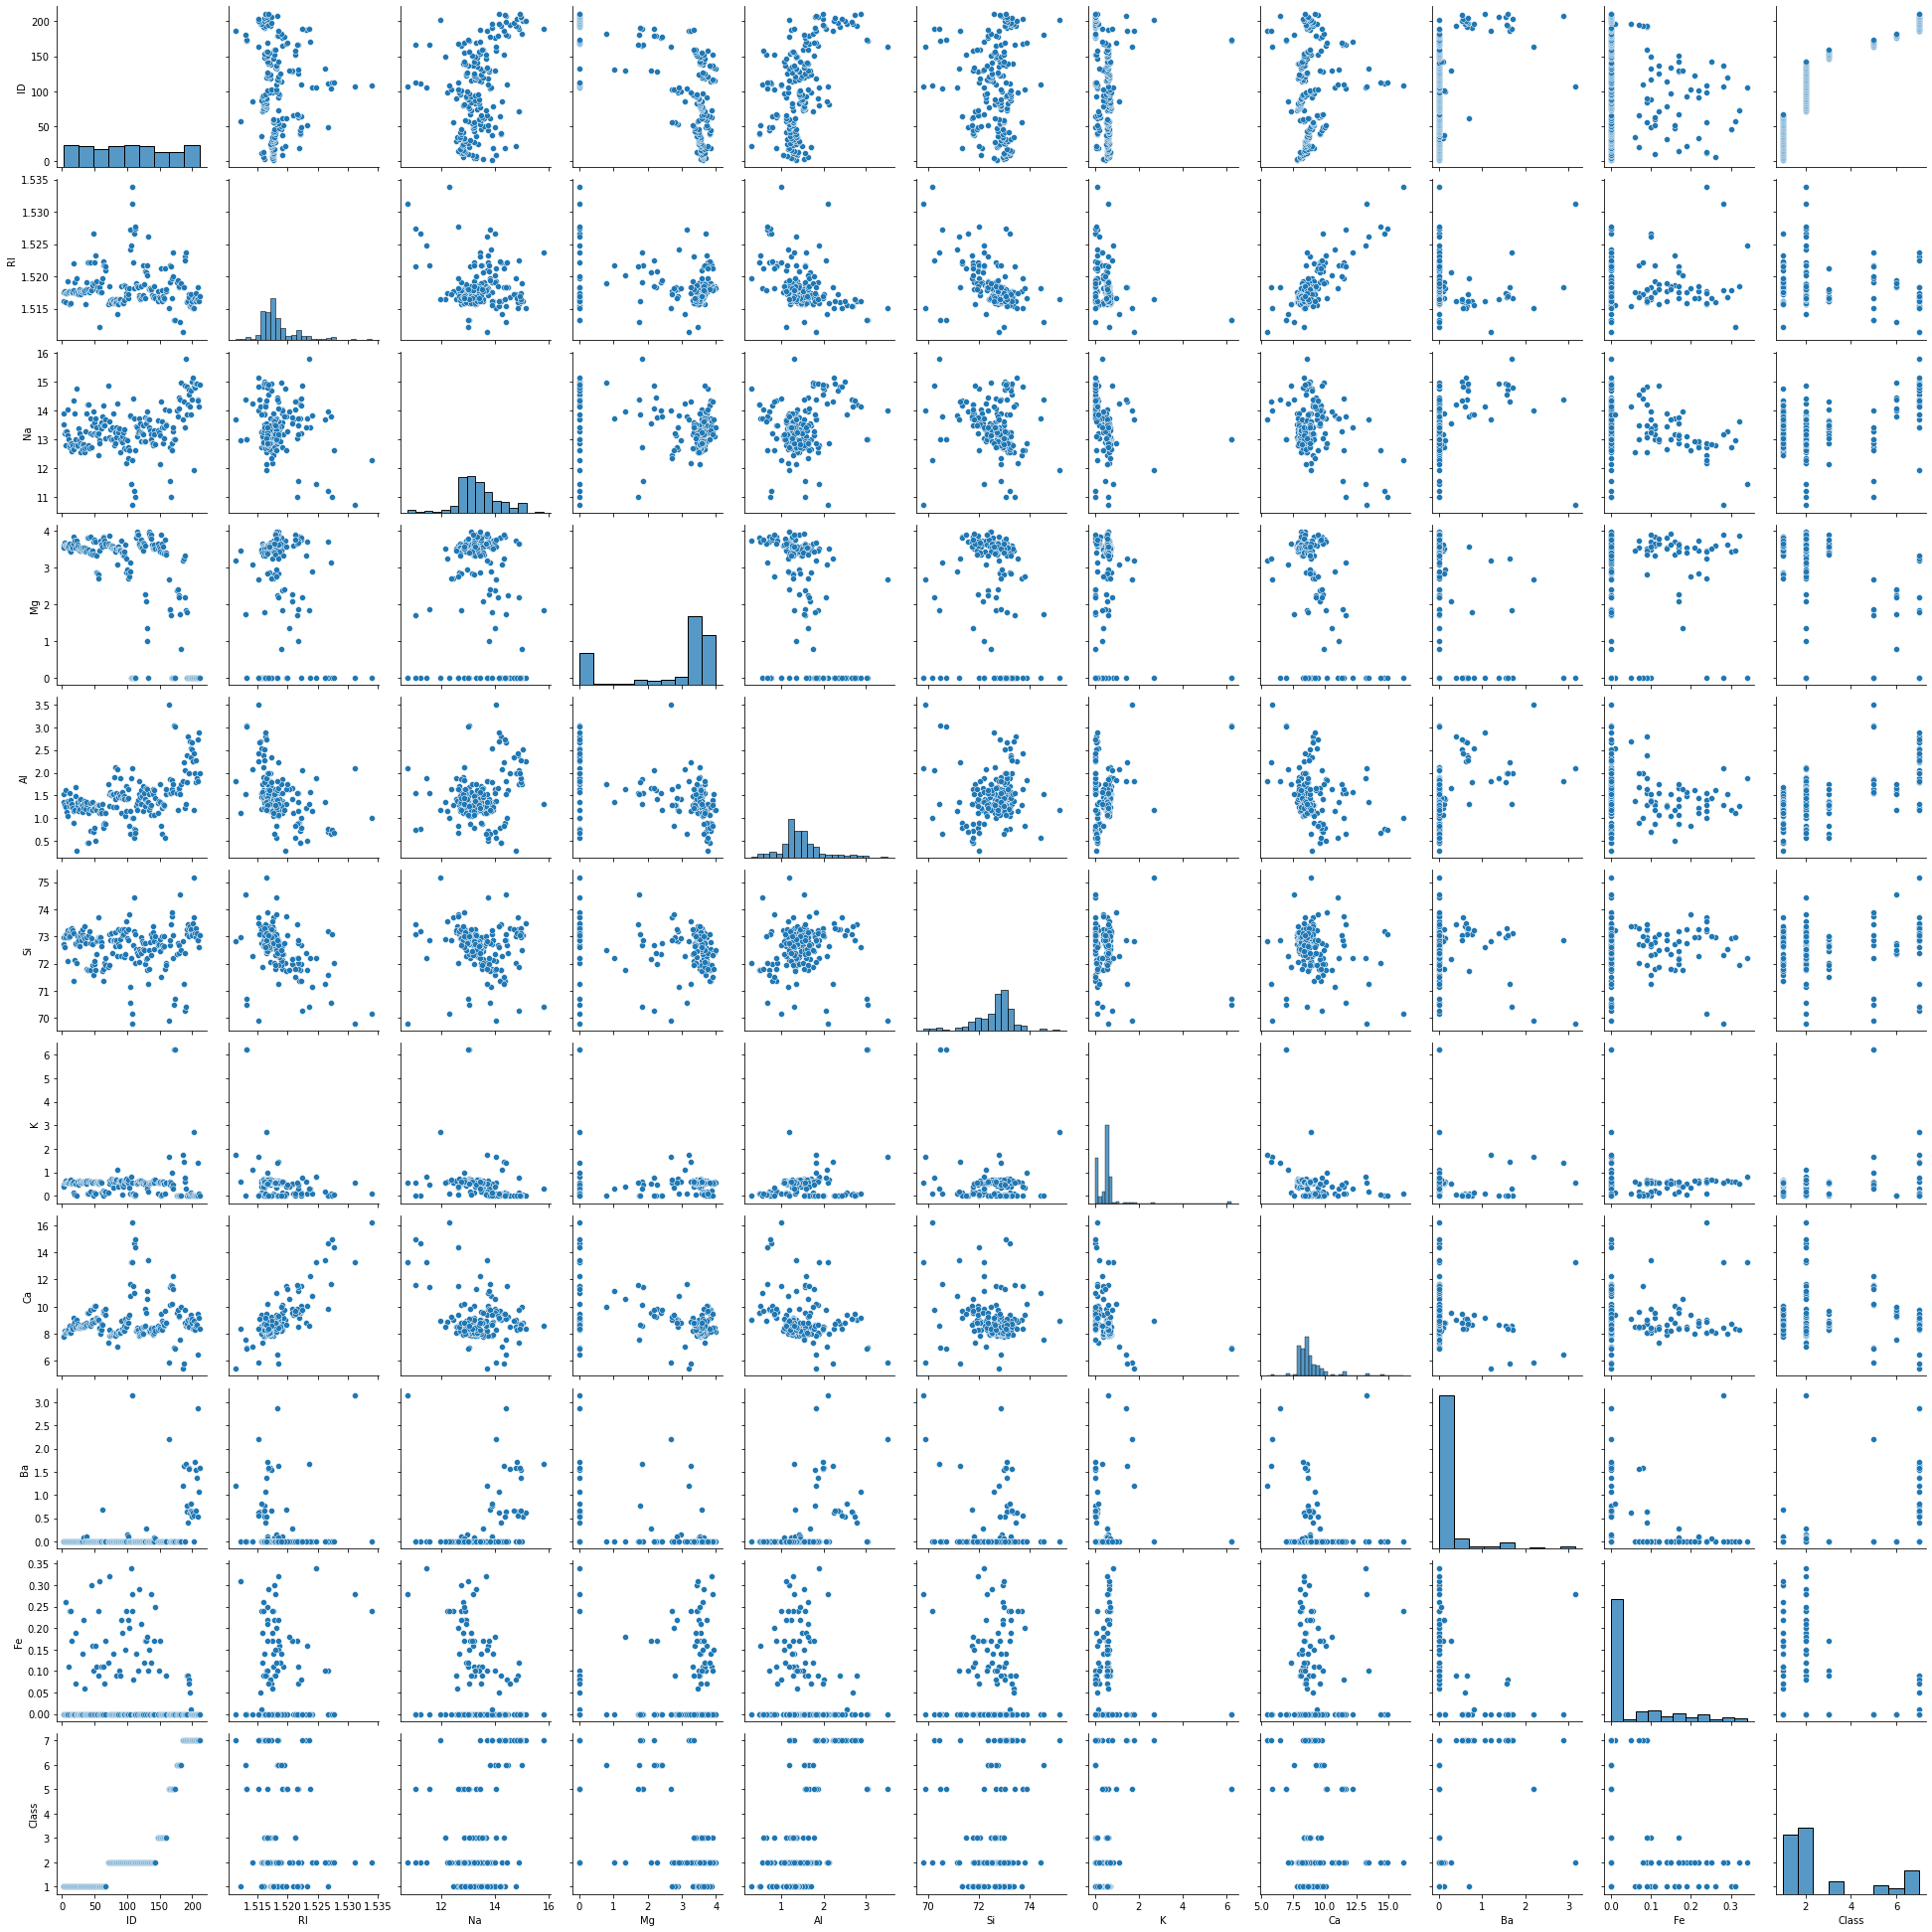

In [41]:
sns.pairplot(df)

Plotting subplots to check for any outliers

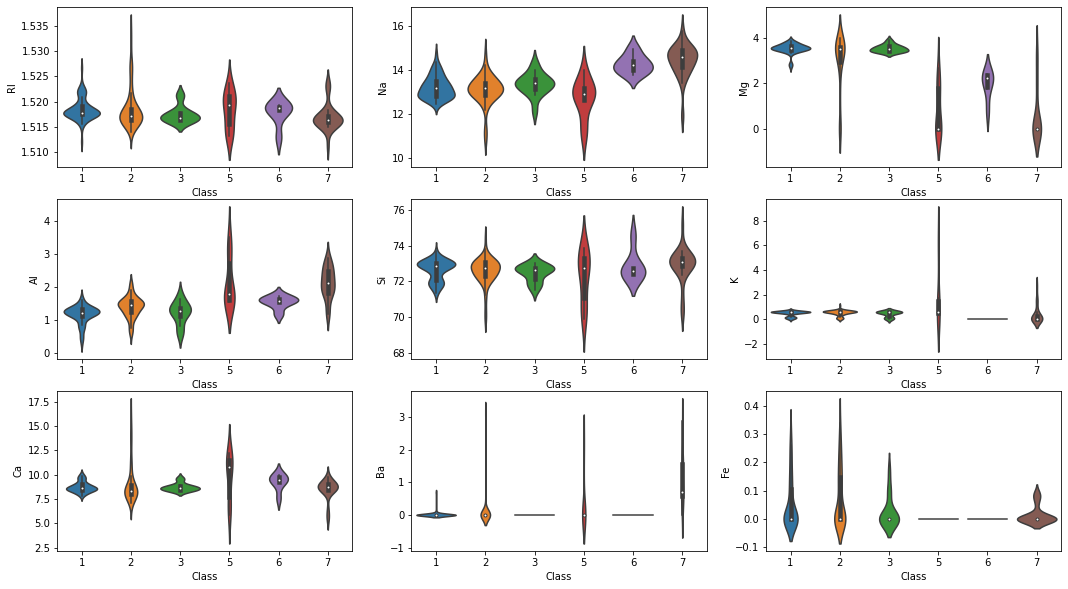

In [137]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
sns.violinplot(ax=axes[0, 0], data=df, x='Class', y='RI')
sns.violinplot(ax=axes[0, 1], data=df, x='Class', y='Na')
sns.violinplot(ax=axes[0, 2], data=df, x='Class', y='Mg')
sns.violinplot(ax=axes[1, 0], data=df, x='Class', y='Al')
sns.violinplot(ax=axes[1, 1], data=df, x='Class', y='Si')
sns.violinplot(ax=axes[1, 2], data=df, x='Class', y='K')
sns.violinplot(ax=axes[2, 0], data=df, x='Class', y='Ca')
sns.violinplot(ax=axes[2, 1], data=df, x='Class', y='Ba')
sns.violinplot(ax=axes[2, 2], data=df, x='Class', y='Fe')

Plotting correlation between features in the form of heatmap

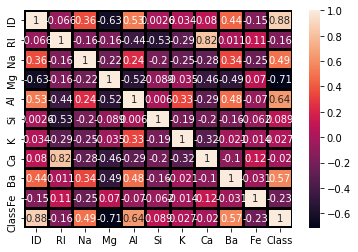

In [114]:
sns.heatmap(df.corr(), annot=True, linecolor='black', linewidth=2)

In [93]:
X = df.drop(['Class', 'ID'], axis=1) # dropping Class and ID since they are not required
Y = df['Class']

In [110]:
# Creating model using the manhattan distance
model1 = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform', metric = 'manhattan').fit(X, Y)
# Creating model using Euclidean distance
model2 = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform', metric = 'euclidean').fit(X, Y)

Import data for testing

In [88]:
test_data = pd.read_csv('/content/testKNN.txt')

In [90]:
test_data.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']
test_data.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35,2


In [106]:
X_test = test_data.drop(['Class', 'ID'], axis=1)
Y_test = test_data['Class']

In [ ]:
def pred(x):
  l = []
  n = X_test.shape[0]
  for v in X_test.values:
    l.append(x.predict([v]))
  return l
y1_pred = pred(model1)
y2_pred = pred(model2)

In [177]:
Y_actual = [y for y in Y_test]

Model Evaluation

In [179]:
print("Using Manhattan distance")
print(f'Accuracy: {accuracy_score(Y_test, y1_pred)}')
print("Using Euclidean distance")
print(f'Accuracy: {accuracy_score(Y_test, y2_pred)}')

Using Manhattan distance
Accuracy: 0.4117647058823529
Using Euclidean distance
Accuracy: 0.4117647058823529


In [187]:
# sklearn classification report
print("For Manhattan distance")
target_names = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']
print(classification_report(Y_actual, y1_pred, target_names=target_names, zero_division=False))
# sklearn euclidean report
print("For Euclidean distance")
target_names = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']
print(classification_report(Y_actual, y2_pred, target_names=target_names, zero_division=False))

For Manhattan distance
              precision    recall  f1-score   support

     class 1       0.29      1.00      0.44         2
     class 2       0.20      0.33      0.25         3
     class 3       0.00      0.00      0.00         3
     class 4       1.00      0.33      0.50         3
     class 5       0.00      0.00      0.00         3
     class 6       0.75      1.00      0.86         3

    accuracy                           0.41        17
   macro avg       0.37      0.44      0.34        17
weighted avg       0.38      0.41      0.34        17

For Euclidean distance
              precision    recall  f1-score   support

     class 1       0.29      1.00      0.44         2
     class 2       0.20      0.33      0.25         3
     class 3       0.00      0.00      0.00         3
     class 4       1.00      0.33      0.50         3
     class 5       0.00      0.00      0.00         3
     class 6       0.75      1.00      0.86         3

    accuracy                   